In [1]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from object_detection.utils import label_map_util


In [2]:
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

In [3]:
def prepare_image(filepath, img_size=224):
    img_array = cv2.imread(filepath)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_array = cv2.resize(img_array, (img_size, img_size))
    return img_array.reshape(-1, img_size, img_size, 3) / 255.0

In [4]:
# # convert to tflite
# converter = tf.lite.TFLiteConverter.from_saved_model('saved_models/ASL_model_V')
# tflite_model = converter.convert()

# # save the model
# with open('saved_models/ASL_model_V.tflite', 'wb') as f:
#     f.write(tflite_model)

In [5]:
model = tf.keras.models.load_model('models/ASL_model_V')

1/1 [==============================] - 0s 14ms/step


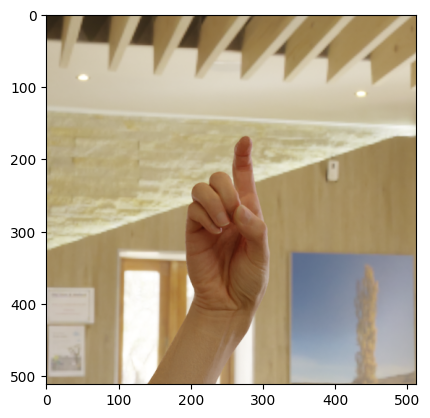

In [11]:
# Make a prediction
prediction = model.predict(prepare_image('Demo/a462d0e6-9324-46d2-896d-bc1b9e429f23.rgb_0000.png'))

image_path = 'Demo/a462d0e6-9324-46d2-896d-bc1b9e429f23.rgb_0000.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()

In [12]:
# Get the predicted category
predicted_category_index = np.argmax(prediction)
predicted_category = categories[predicted_category_index]

# Print the result
print(f"Letter: {predicted_category}")

Letter: X
